In [176]:
import itertools
import pandas as pd
import pymannkendall as mk
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

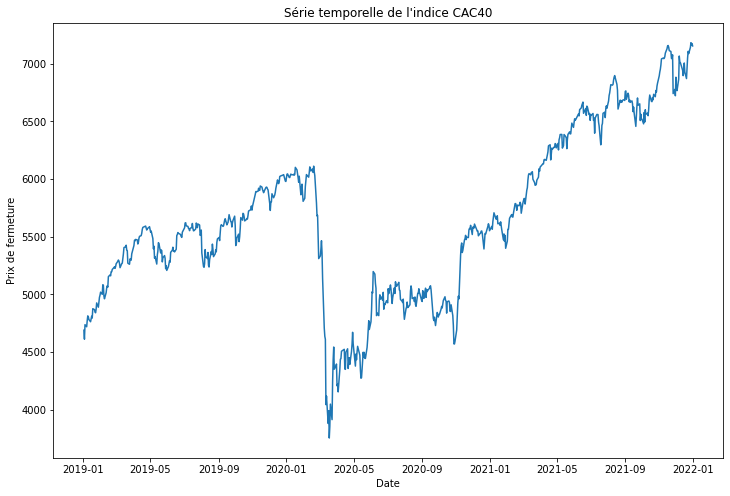

In [177]:

# Obtenir les données de l'indice CAC40
cac40 = yf.Ticker("^FCHI")
cac40_df = cac40.history(period="max")

# Sélectionner les données entre les dates spécifiées
start_date = '2019-01-01'
end_date = '2022-01-01'
cac40_df = cac40_df[start_date:end_date]

# Tracer le graphique de la série temporelle de l'indice CAC40
plt.plot(cac40_df['Close'])
plt.xlabel('Date')
plt.ylabel('Prix de fermeture')
plt.title('Série temporelle de l\'indice CAC40')
plt.show()

In [ ]:
!pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
cac40_dfv = cac40_df.reset_index()

In [179]:
cac40_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00+01:00,4642.180176,4699.979980,4606.200195,4689.390137,76980400,0.0,0.0
2019-01-03 00:00:00+01:00,4641.799805,4671.279785,4607.680176,4611.490234,78741500,0.0,0.0
2019-01-04 00:00:00+01:00,4649.629883,4750.509766,4636.790039,4737.120117,95967400,0.0,0.0
2019-01-07 00:00:00+01:00,4757.009766,4760.270020,4690.220215,4719.169922,73900700,0.0,0.0
2019-01-08 00:00:00+01:00,4722.160156,4810.270020,4719.229980,4773.270020,98114900,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-27 00:00:00+01:00,7070.140137,7149.140137,7062.399902,7140.390137,34917800,0.0,0.0
2021-12-28 00:00:00+01:00,7141.850098,7187.759766,7141.669922,7181.109863,36149600,0.0,0.0
2021-12-29 00:00:00+01:00,7179.109863,7201.649902,7137.350098,7161.520020,37481200,0.0,0.0


In [180]:
cac40_dfv['Date']= pd.to_datetime(cac40_dfv['Date'])

In [181]:
mk.original_test(cac40_df['Close'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=20.306827034038324, Tau=0.48898383800854545, s=144771.0, var_s=50824487.666666664, slope=2.3029063167735044, intercept=4691.967335653712)

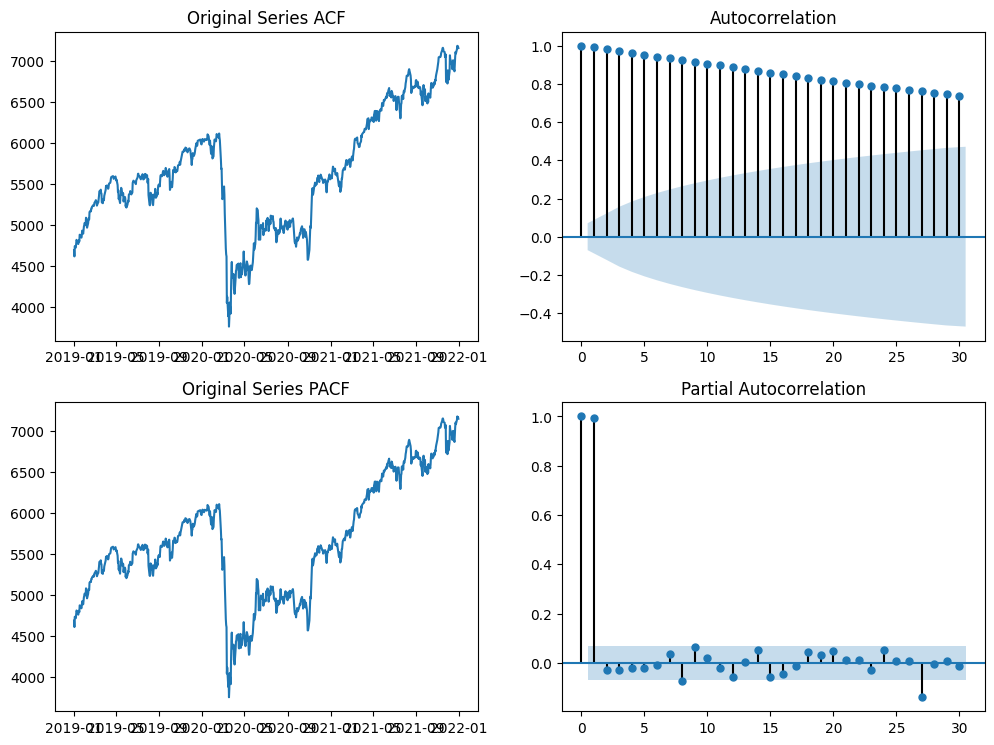

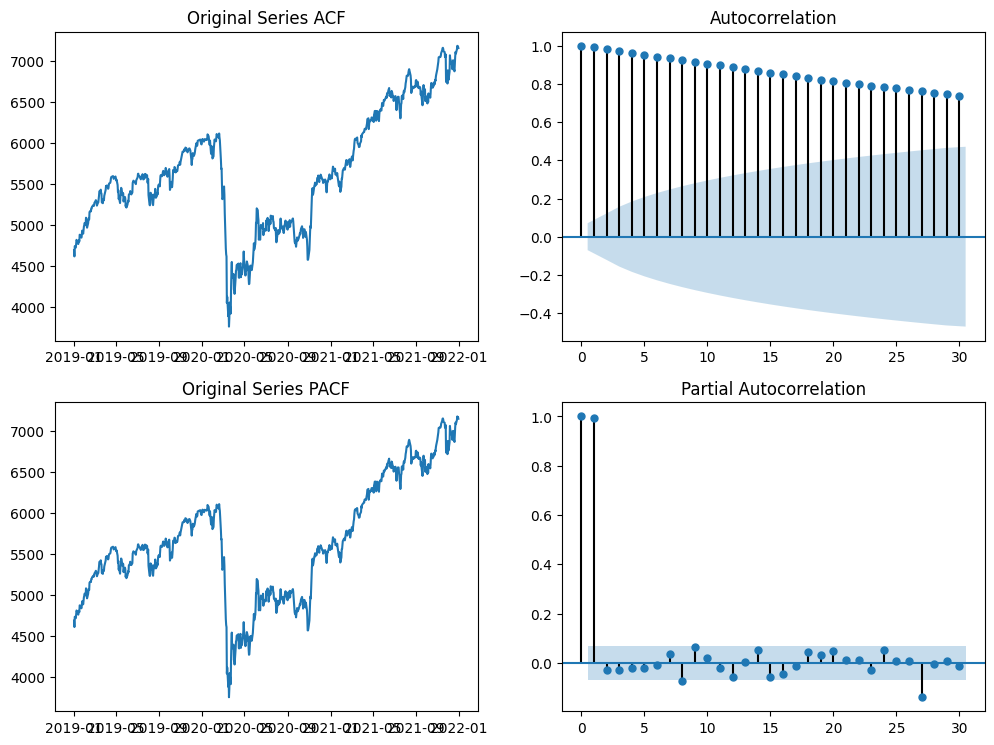

In [182]:
fig, axes = plt.subplots(2,2,figsize=(12,9), dpi=100)
axes[0,0].plot(cac40_df['Close']); axes[0,0].set_title('Original Series ACF')
plot_acf(cac40_df['Close'], ax = axes[0,1], lags = 30, alpha = 0.05 )
axes[1,0].plot(cac40_df['Close']); axes[1,0].set_title('Original Series PACF')
plot_pacf(cac40_df['Close'], ax = axes[1,1], lags = 30, alpha = 0.05)

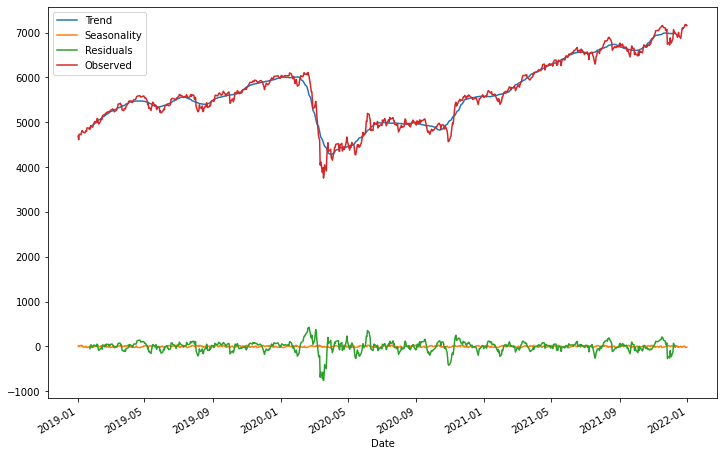

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose

# décomposer la série chronologique en ses composants
freq = 12
cac40_df.index = pd.to_datetime(cac40_df.index)

# décomposer la série chronologique en ses composants
result = seasonal_decompose(cac40_df[['Close']], period=30)

# afficher les composants
result.trend.plot()
result.seasonal.plot()
result.resid.plot()
result.observed.plot()
plt.legend(['Trend', 'Seasonality', 'Residuals', 'Observed'])
plt.show()

In [127]:
from statsmodels.tsa.stattools import adfuller

# effectuer un test de Dickey-Fuller
result = adfuller(cac40_df['Close'])

# afficher les résultats du test
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.1001153142764777
p-value: 0.7150259169722541
Critical Values:
	1%: -3.4389722010249386
	5%: -2.8653454308425705
	10%: -2.5687964010457227


In [183]:
from statsmodels.tsa.stattools import adfuller

d = 0
p_value = 1
while p_value > 0.05:
    d += 1
    result = adfuller(cac40_df['Close'].diff(d).dropna())
    p_value = result[1]

print(f"L'ordre de différenciation approprié pour la série temporelle de l'indice CAC40 est {d}")

L'ordre de différenciation approprié pour la série temporelle de l'indice CAC40 est 1


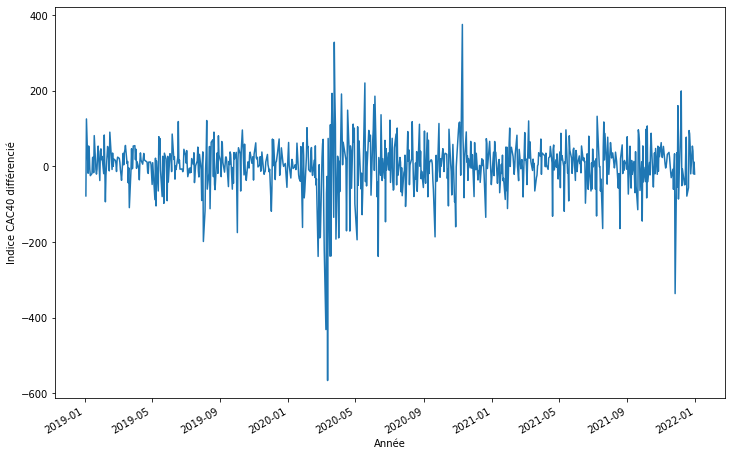

In [184]:
cac40_df['Close'].diff(1).dropna().plot(figsize=(12,8))
plt.xlabel('Année')
plt.ylabel('Indice CAC40 différencié')
plt.show()

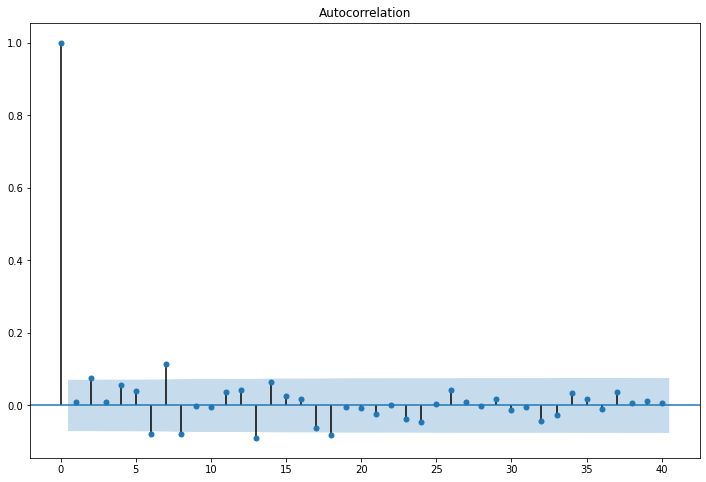

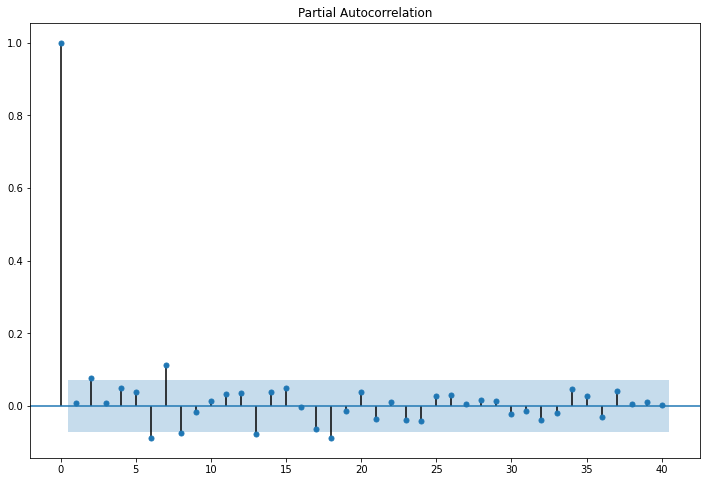

In [185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(cac40_df['Close'].diff(1).dropna(), lags=40)
plot_pacf(cac40_df['Close'].diff(1).dropna(), lags=40)
plt.show()

In [186]:
import statsmodels.api as sm

# Define the p and q parameters to take any value between 0 and 2
p = range(1, 4)
q = range(1, 4)

# Generate all different combinations of p and q
pq = list(itertools.product(p, q))

# Define the d parameter
d = 0

# Define the combinations and score with AIC
best_score, best_cfg = float("inf"), None
for cfg in pq:
    try:
        # Define the ARIMA model
        model = sm.tsa.statespace.SARIMAX(cac40_df['Close'].diff(1).dropna(), order=(cfg[0], d, cfg[1]))
        # Fit the model
        model_fit = model.fit()
        # Get the AIC value
        aic = model_fit.aic
        if aic < best_score:
            best_score, best_cfg = aic, cfg
        print('ARIMA%s AIC=%.3f' % (cfg, aic))
    except:
        continue

print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))


ARIMA(1, 1) AIC=8708.466
ARIMA(1, 2) AIC=8708.313
ARIMA(1, 3) AIC=8709.812
ARIMA(2, 1) AIC=8708.192
ARIMA(2, 2) AIC=8709.762
ARIMA(2, 3) AIC=8711.709
ARIMA(3, 1) AIC=8709.989
ARIMA(3, 2) AIC=8712.188
ARIMA(3, 3) AIC=8702.736
Best ARIMA(3, 3) AIC=8702.736


In [187]:
from statsmodels.tsa.arima.model import ARIMA



model = ARIMA (cac40_df['Close'], order=(3,1,3))

model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  770
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4344.267
Date:                Sun, 15 Jan 2023   AIC                           8702.534
Time:                        22:57:02   BIC                           8735.050
Sample:                             0   HQIC                          8715.049
                                - 770                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5538      0.057     -9.647      0.000      -0.666      -0.441
ar.L2          0.6483      0.064     10.197      0.000       0.524       0.773
ar.L3          0.8937      0.058     15.534      0.0

In [188]:
# Effectuer le test de Ljung-Box sur les résidus
residuals = model_fit.resid
ljungbox_test = acorr_ljungbox(residuals, lags = 17)
p_value = ljungbox_test[1]

# Vérifier l'absence d'autocorrélation
if (p_value > 0.05).all():
    print("Il n'y a pas d'autocorrélation dans les résidus.")
else:
    print("Il y a de l'autocorrélation dans les résidus.")

Il n'y a pas d'autocorrélation dans les résidus.


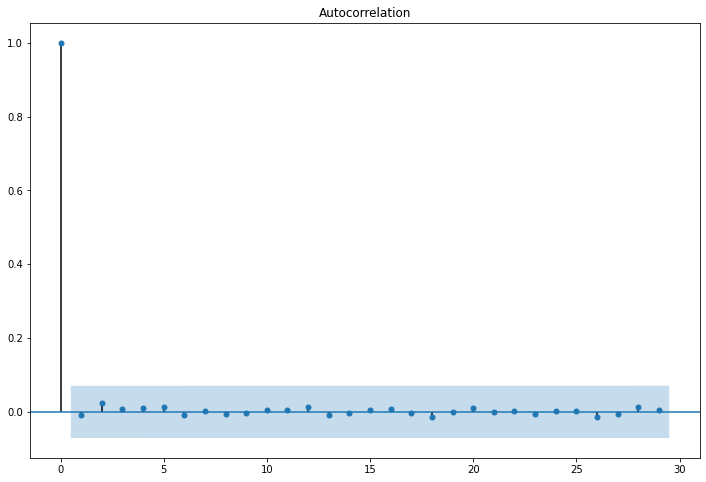

In [189]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Obtenir les résidus du modèle
residuals = model_fit.resid

# Tracer la courbe des résidus
plot_acf(residuals)
plt.show()

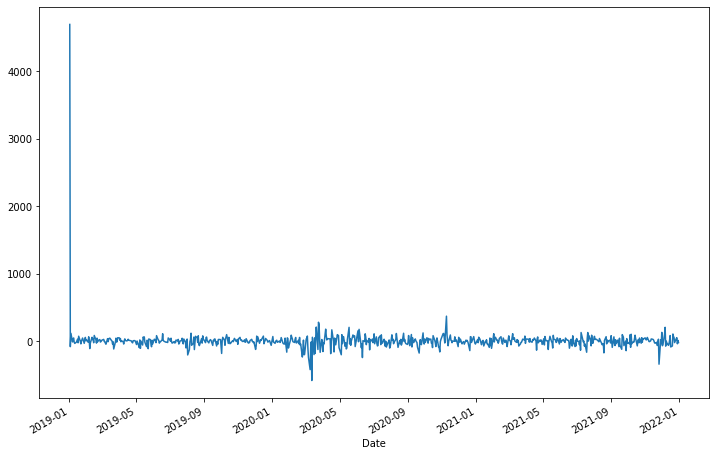

In [190]:
# Obtenir les résidus
residuals = model_fit.resid

# Tracer les résidus
residuals.plot()
plt.show()

In [204]:
from scipy.stats import jarque_bera

jarque_bera_test = jarque_bera(model_fit.resid)
p_value = jarque_bera_test[1]
print(p_value)

0.0


In [205]:
from scipy.stats import jarque_bera

# Calculer les résidus du modèle ARIMA
residuals = model_fit.resid

# Effectuer le test de Jarque-Bera
jb_value, jb_pvalue = jarque_bera(residuals)
print("JB Value: ", jb_value)
print("JB p-value: ", jb_pvalue)

JB Value:  10224564.06384184
JB p-value:  0.0


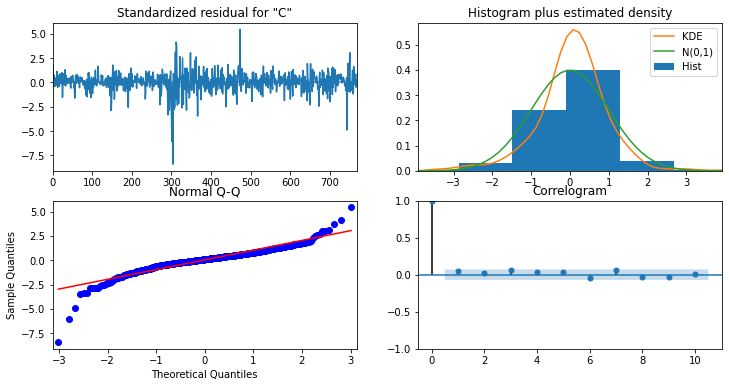

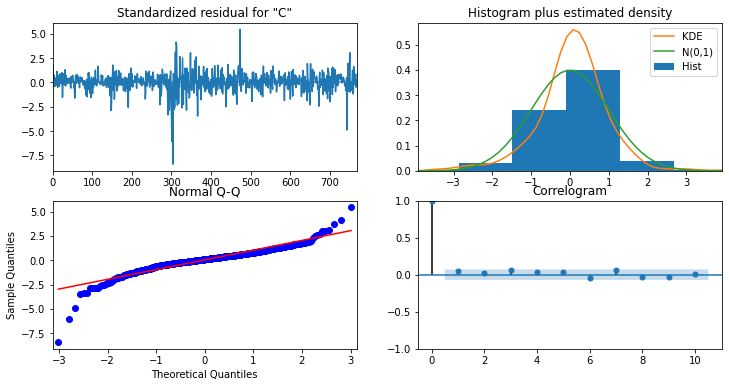

In [192]:
model_fit.plot_diagnostics(figsize=(12,6))

In [193]:
train = list(cac40_df['Close'][:600])
test = list(cac40_df['Close'][600:])
model_predictions = []

In [194]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
n = len(test)
for i in range(n):
    model = ARIMA(train, order=(3,1,3))
    fitted = model.fit()
    fc = fitted.forecast()
    model_predictions.append(fc)
    actual = test[i]
    train.append(actual)

In [195]:
model_predictions = [model_predictions[i][0] for i in range(n)]

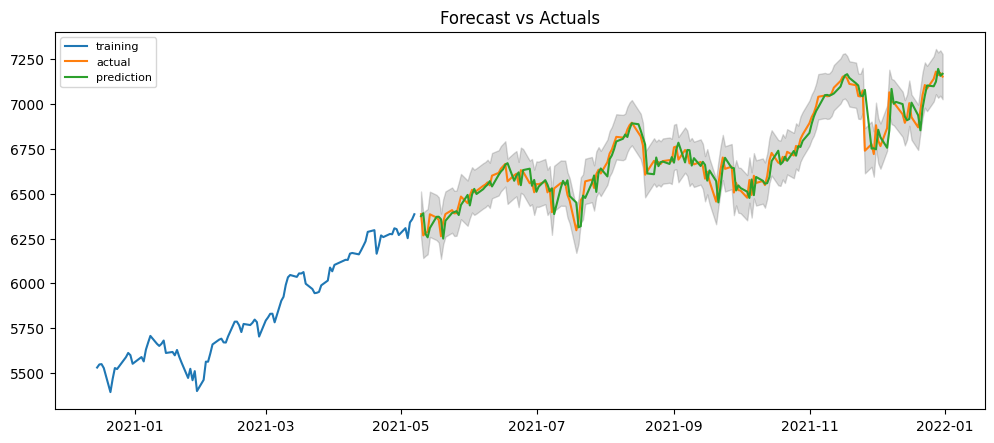

In [196]:
residuals = [cac40_df['Close'][600+i] - model_predictions[i] for i in range(n)]
fc_series = pd.Series(np.array(model_predictions), index=cac40_df['Close'][600:].index)
RMSFE = np.sqrt(sum([x**2 for x in residuals]) / len(residuals))
band_size = 1.96*RMSFE
lower_series = pd.Series(test-band_size, index=cac40_df['Close'][600:].index)
upper_series = pd.Series(test+band_size, index=cac40_df['Close'][600:].index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cac40_df['Close'][500:600], label='training')
plt.plot(cac40_df['Close'][600:], label='actual')
plt.plot(fc_series, label='prediction')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [200]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  770
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4344.267
Date:                Sun, 15 Jan 2023   AIC                           8702.534
Time:                        23:02:53   BIC                           8735.050
Sample:                             0   HQIC                          8715.049
                                - 770                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5538      0.057     -9.647      0.000      -0.666      -0.441
ar.L2          0.6483      0.064     10.197      0.000       0.524       0.773
ar.L3          0.8937      0.058     15.534      0.0

In [198]:
from sklearn import metrics

mae = metrics.mean_absolute_error(cac40_df['Close'][600:], model_predictions)
mse = metrics.mean_squared_error(cac40_df['Close'][600:], model_predictions)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(cac40_df['Close'][600:], model_predictions)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 46.77348539946777
MSE: 4152.376165835622
RMSE: 64.43893361808233
R-Squared: 0.9188680753816862


In [201]:
from copy import deepcopy

n = 31
data = list(cac40_df['Close'])
model_predictions = []
for i in range(n):
  model = ARIMA(np.array(data), order=(3,1,3))
  fitted = model.fit()
  fc = fitted.forecast()
  model_predictions.append(fc[0])
  data.append(fc[0])

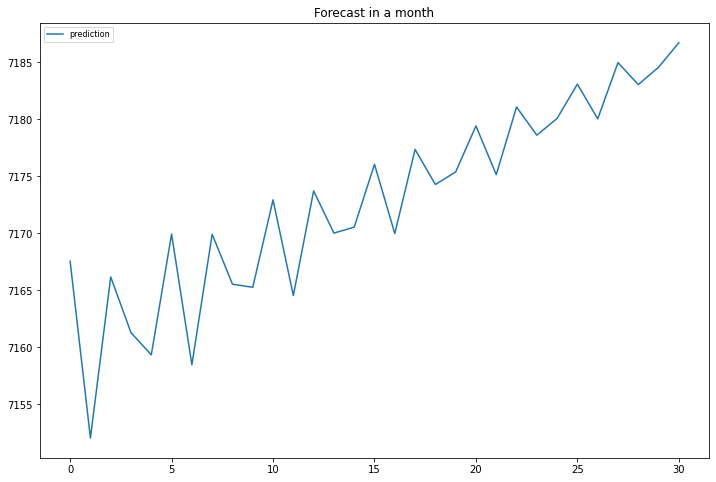

In [202]:
fc_series = pd.Series(np.array(model_predictions))
plt.plot(fc_series, label='prediction')
plt.title('Forecast in a month')
plt.legend(loc='upper left', fontsize=8)
plt.show()